<a href="https://colab.research.google.com/github/Suesue098/Basic/blob/main/FIFA_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from datetime import datetime, timedelta

In [5]:
df = pd.read_csv('fifa21 raw data v2.csv')

<ipython-input-5-e8a5c45769e7>:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21 raw data v2.csv')


In [6]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [7]:
df.shape

(18979, 77)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [9]:
df.duplicated().sum()

0

In [10]:
df['ID'].duplicated().sum()

0

# Remove useless columns

*photo url, if necessary, we could check that it is correct using https://cdn.sofifa.com/players/first 3 digits of ID/last 3 digits of ID/21_60.png

*player url, if necessary, we could check that it is correct using http://sofifa.com/player/id/name-surname/210006/

In [11]:
columns = ['LongName', 'photoUrl', 'playerUrl']
df = df.drop(columns,axis = 1)

In [12]:
#↓OVA does not comply with the column format so we will change it to OVA
df = df.rename(columns = {'↓OVA': "OVA"})

# remove the unnecessary newline characters

In [13]:
df['Club'] = df['Club'].str.strip('\n')

# Convert the height and weight columns to numerical forms

In [14]:
df['Height'] = df['Height'].str.strip('cm')
df['Height'].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '6\'2"', '164', '198', '6\'3"', '6\'5"', '5\'11"', '6\'4"',
       '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"', '5\'4"',
       '201', '158', '162', '161', '160', '203', '157', '156', '202',
       '159', '206', '155'], dtype=object)

In [15]:
def ft_to_cm(x):
  if "'" in x:
    ft = x.replace("'",".").replace('"',"")
    cm = round(float(ft)* 30.48,0)
    return int(cm)
  else:
    return int(x)


In [16]:
df['Height'] = df['Height'].apply(ft_to_cm)
df['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 156,
       155, 201, 158, 162, 161, 160, 203, 157, 202, 159, 206])

In [17]:
df['Weight'] = df['Weight'].str.strip('kg')
df['Weight'].unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '183lbs',
       '179lbs', '172lbs', '196lbs', '176lbs', '185lbs', '170lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '190lbs',
       '174lbs', '148lbs', '165lbs', '159lbs', '192lbs', '181lbs',
       '139lbs', '154lbs', '157lbs', '163lbs', '98', '103', '99', '102',
       '56', '101', '57', '55', '104', '107', '110', '53', '50', '54',
       '52'], dtype=object)

In [18]:
def lbs_to_kg(x):
  if 'lbs' in x:
    lbs = x.replace('lbs','')
    kilograms = round(int(lbs)/2.2,0)
    return int(kilograms)
  else:
    return int(x)

df['Weight'] = df['Weight'].apply(lbs_to_kg)
df['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

# 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc

In [19]:
def money(x):
  if '€' in x:
    x = x.replace('€','')
  if 'M' in x:
    x = x.replace('M','')
    x = float(x)*1000000
    return int(x)

  elif 'K' in x:
    x = x.replace('K','')
    x = float(x) * 1000
    return int(x)
  else:
    return int(x)


In [20]:
df['Value'] = df['Value'].apply(money)
df['Wage'] = df['Wage'].apply(money)
df['Release Clause'] = df['Release Clause'].apply(money)

In [21]:
df['Value'].unique()

array([103500000,  63000000, 120000000, 129000000, 132000000, 111000000,
       120500000, 102000000, 185500000, 110000000, 113000000,  90500000,
        82000000,  17500000,  83500000,  33500000, 114500000,  78000000,
       103000000, 109000000,  92000000,  10000000,  76500000,  89500000,
        87500000,  79500000, 124000000, 114000000,  95000000,  92500000,
       105500000,  88500000,  85000000,  81500000,  26000000,  21000000,
        56000000,  67500000,  53000000,  36500000,  51000000,  65500000,
        46500000,  61500000,  72500000,  77500000,  43500000,  32500000,
        36000000,  32000000,  54000000,  49500000,  57000000,  66500000,
        74500000,  71500000, 121000000,  99000000,  67000000,  86500000,
        93500000,  70000000,  62000000,  66000000,  58000000,  44000000,
        81000000,  37000000,  14500000,  46000000,  47500000,  52500000,
        54500000,  34500000,  57500000,  51500000,  44500000,  55000000,
        48000000,  60500000,  63500000,  61000000, 

# Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical

In [22]:
df['W/F'] = df['W/F'].str.replace('★','')
df['SM'] = df['SM'].str.replace('★','')
df['IR'] = df['IR'].str.replace('★','')

In [23]:
df.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

# Split contract column

In [24]:
def type(x):
  if "Free" in x:
    return "Free"
  if "Loan" in x:
    return "Loan"
  if "~" in x:
    return "Contract"
  else:
    return pd.na

In [25]:
def start_time_contract(x):
  if "~" in x:
    return int(x[:4])
  if "Loan" in x:
    x = x.strip("On Loan")
    x = datetime.strptime(x, '%b %d, %Y')
    return x.date()
  else:
    return pd.NA

def end_time_contract(type, contract, loan):
  if type =="Contract":
    return int(contract[-4:])
  if type =="Loan":
    loan = datetime.strptime(loan, '%b %d, %Y')
    return loan.date()
  else:
    return pd.NA

In [26]:
df['Type of contract'] = df['Contract'].apply(type)
df['Start year'] = df['Contract'].apply(start_time_contract)
df['End year'] = df.apply(lambda row: end_time_contract(row['Type of contract'],
                                                        row['Contract'], row['Loan Date End']), axis = 1)

In [27]:
df = df[list(df.columns[:7]) + list(df.columns[-3:]) + list(df.columns[8:-3])]
df = df.drop(columns = ['Loan Date End'])

Because the metrics within FIFA have a range from 0 to 99, a better representation of their sum would be an average

In [28]:
df['Attacking'] = round(df['Attacking']/5,0)
df['Attacking'] = df['Attacking'].astype('int64')

df['Skill'] = df['Skill']/5
df['Skill'] = df['Skill'].astype('int64')

df["Movement"]=df["Movement"]/5
df["Movement"]=df["Movement"].astype("int64")

df["Power"]=df["Power"]/5
df["Power"]=df["Power"].astype("int64")

df["Mentality"]=df["Mentality"]/6
df["Mentality"]=df["Mentality"].astype("int64")

df["Defending"]=df["Defending"]/3
df["Defending"]=df["Defending"].astype("int64")

df["Goalkeeping"] = df["Goalkeeping"]/5
df["Goalkeeping"] = df["Goalkeeping"].astype("int64")

In [29]:
df=df.rename(columns = {'Attacking':'Attacking AVG', "Skill":"Skill AVG", "Movement":"Movement AVG",
                        'Power':'Power AVG', "Mentality":"Mentality AVG", "Defending":"Defending AVG", "Goalkeeping":"Goalkeeping AVG"})

Finally, the clean dataset

In [30]:
df

,ID,Name,Nationality,Age,OVA,POT,Club,Type of contract,Start year,End year,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,Contract,2004,2021,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,Contract,2018,2022,...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,Contract,2014,2023,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,Contract,2015,2023,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,Contract,2017,2022,...,High,Medium,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,Contract,2018,2022,...,Medium,Medium,1,64,28,26,38,48,51,NaN
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,Contract,2020,2021,...,Medium,Medium,1,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,England,18,47,65,Derry City,Contract,2019,2020,...,Medium,Medium,1,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,Contract,2020,2022,...,Medium,Medium,1,58,49,41,49,30,44,NaN


#Data visualization

In [31]:
position_by_order = ["GK", "LWB", "LB", "CB", "RB", "RWB", "CDM", "LM", "CM", "RM", "CAM", "LW", "CF", "RW", "ST"]

position_colors = {'GK':'blue',"LB": "green", "CB": "green", "RB": "green","LWB": "green","RWB": "green",
                   "CDM": "green", "LM": "orange","CM": "orange","RM": "orange","CAM": "orange","LW": "red",
                   "CF": "red", "RW": "red", "ST": "red"}

deffensive = ["LB", "CB", "RB", "LWB", "RWB", "CDM"]
midfield = ["LM", "CM", "RM", "CAM"]
offensive =["LW", "CF", "RW", "ST"]

#Correlation Heatmap

In [32]:
df_s = df[["Age","OVA","POT","Height","Weight","BOV","Value","Wage","Release Clause","Attacking AVG",
           "Skill AVG","Movement AVG","Power AVG","Mentality AVG","Defending AVG","Goalkeeping AVG",
           "PAC","SHO","PAS", "DRI","DEF","PHY"]]

corr_matrix = df_s.corr()

In [33]:
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

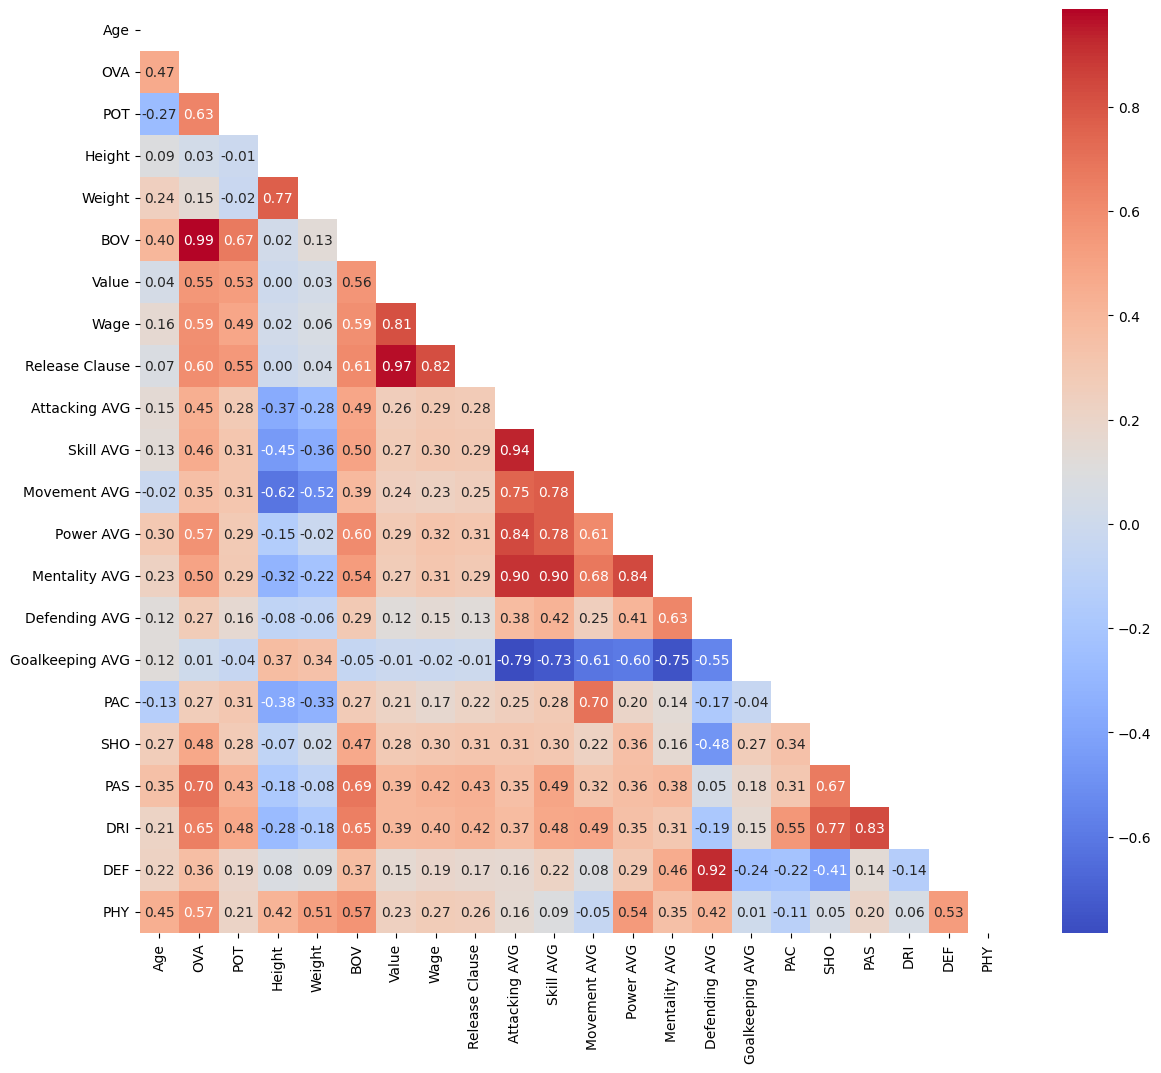

In [37]:
plt.figure(figsize = (14,12))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', mask = mask)
plt.show()

In [38]:
high_corr = corr_matrix[(corr_matrix > 0.6) | (corr_matrix <-0.6)]


In [39]:
mask = np.triu(np.ones_like(high_corr, dtype = bool))

<Axes: >

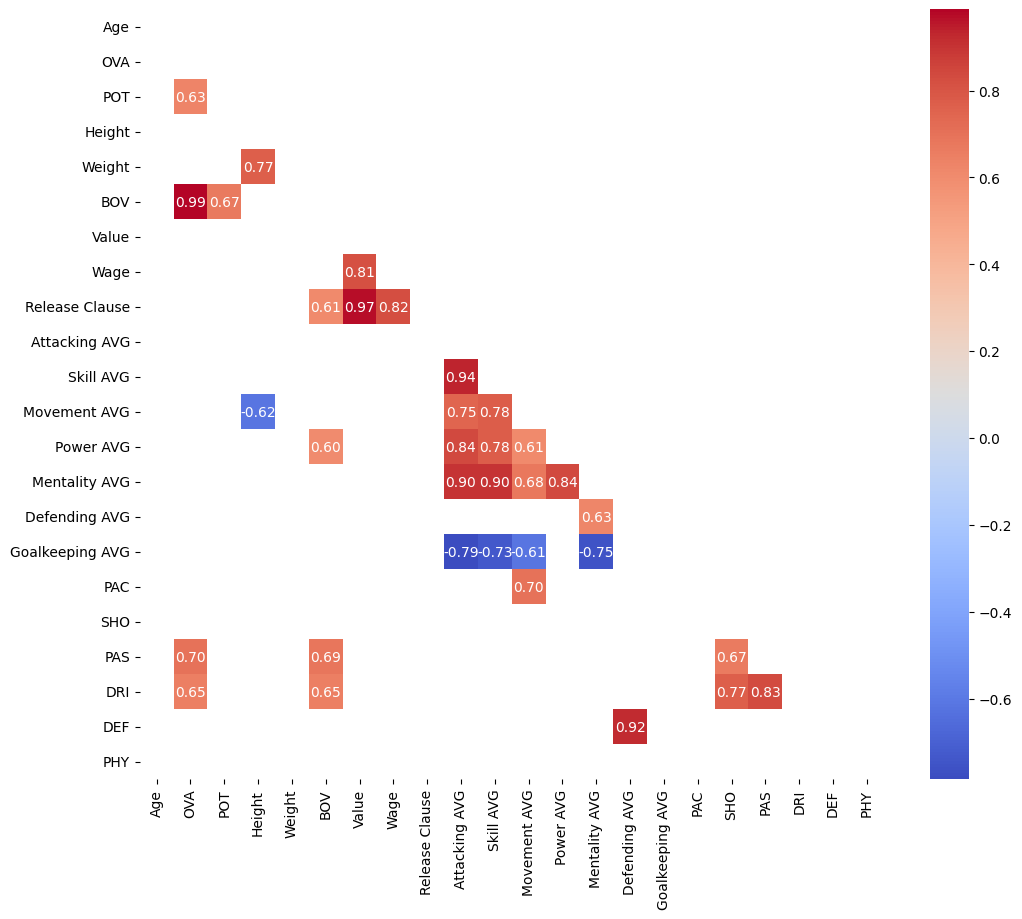

In [41]:
plt.figure(figsize = (12,10))
sns.heatmap(high_corr, annot = True, fmt = '.2f', cmap = 'coolwarm', mask = mask)

# Overall Rating Distribution

(array([  116.,  3318., 10125.,  4914.,   494.,    12.]),
 array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 6 artists>)

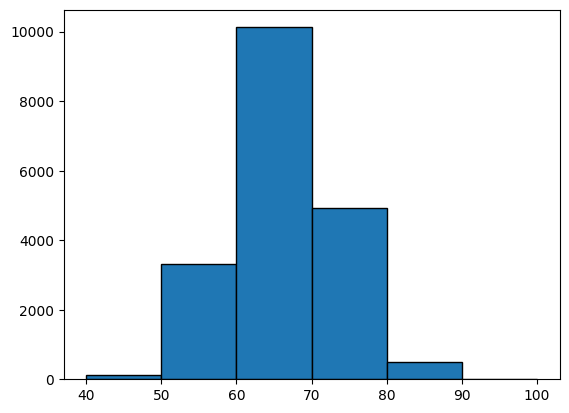

In [42]:
plt.hist(df['OVA'], bins = range(40, 100+10, 10), edgecolor = 'k')

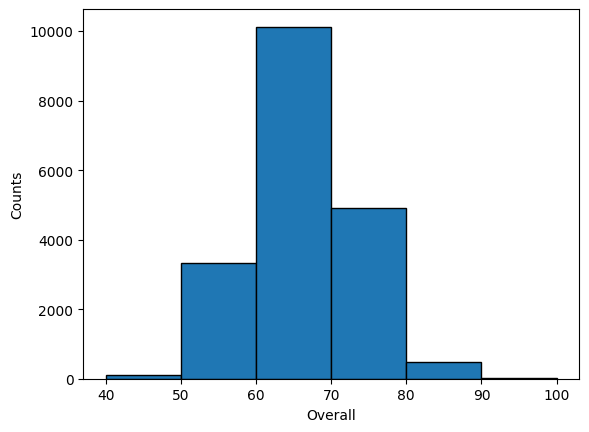

In [44]:
plt.hist(df['OVA'], bins = range(40, 100+10, 10), edgecolor = 'k')
plt.ylabel('Counts')
plt.xlabel('Overall')
plt.show()

#Best position distribution